# Loading dependencies

In [1]:
import shap
import joblib
import os
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

shap.__version__

shap.initjs()

# Loading data

In [15]:
data = pd.read_csv('../data/final-data.csv').drop('notEnrolled', axis=1)
X, y = data.drop('dropoutStatus', axis=1), data['dropoutStatus']

sc = StandardScaler()
X_scaled = sc.fit_transform(X=X)
X[sc.get_feature_names_out()] = X_scaled

# Loading model and making predictions

In [16]:
numberOfModels = len(os.listdir('../models'))
model = joblib.load(f'../models/model_{numberOfModels}.pth')
model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [17]:
y_pred = model.predict(X)
accuracy_score(y, y_pred)

0.7704439252336449

# Creating explainer model

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

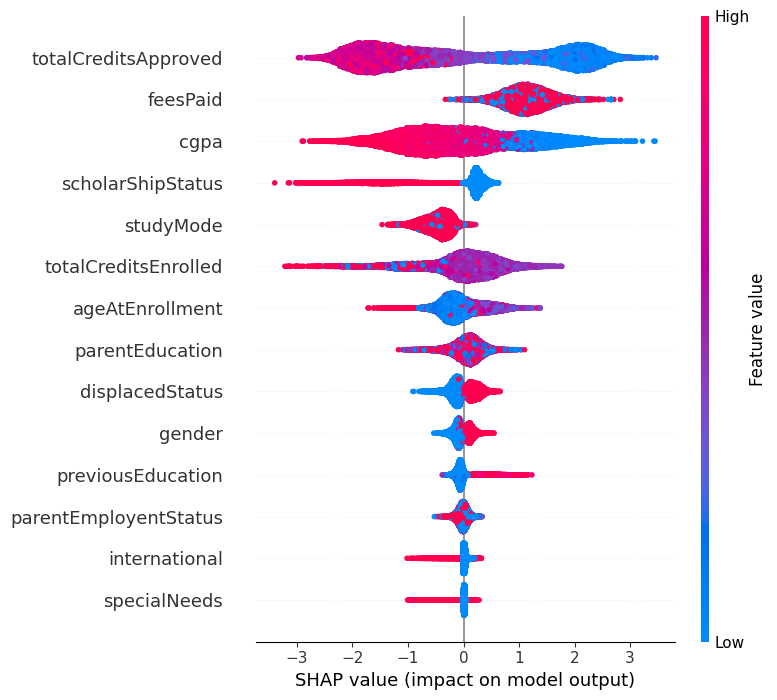

In [19]:
shap.summary_plot(shap_values, X)